In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['font.size'] = 25

In [2]:
import re

In [3]:
two_c = """After round 1, train_loss = 0.1796, dev_loss = 0.1732, dev_acc = 0.9495, dev_prec = 0.9489, dev_rec = 0.9488, dev_f1 = 0.9489
After round 2, train_loss = 0.1093, dev_loss = 0.1103, dev_acc = 0.9675, dev_prec = 0.9673, dev_rec = 0.9669, dev_f1 = 0.9671
After round 3, train_loss = 0.0813, dev_loss = 0.0849, dev_acc = 0.9738, dev_prec = 0.9734, dev_rec = 0.9733, dev_f1 = 0.9734
After round 4, train_loss = 0.0664, dev_loss = 0.0743, dev_acc = 0.9771, dev_prec = 0.9771, dev_rec = 0.9768, dev_f1 = 0.977
After round 5, train_loss = 0.057, dev_loss = 0.0674, dev_acc = 0.9793, dev_prec = 0.9794, dev_rec = 0.979, dev_f1 = 0.9792
After round 6, train_loss = 0.0499, dev_loss = 0.0612, dev_acc = 0.9814, dev_prec = 0.981, dev_rec = 0.9814, dev_f1 = 0.9812
After round 7, train_loss = 0.0459, dev_loss = 0.0598, dev_acc = 0.9813, dev_prec = 0.981, dev_rec = 0.9818, dev_f1 = 0.9814
After round 8, train_loss = 0.0429, dev_loss = 0.0584, dev_acc = 0.9812, dev_prec = 0.9812, dev_rec = 0.9812, dev_f1 = 0.9812
After round 9, train_loss = 0.0381, dev_loss = 0.0547, dev_acc = 0.9824, dev_prec = 0.9824, dev_rec = 0.9825, dev_f1 = 0.9824
After round 10, train_loss = 0.0364, dev_loss = 0.0548, dev_acc = 0.9835, dev_prec = 0.9834, dev_rec = 0.9831, dev_f1 = 0.9833
After round 11, train_loss = 0.0337, dev_loss = 0.0533, dev_acc = 0.9829, dev_prec = 0.9829, dev_rec = 0.983, dev_f1 = 0.983
After round 12, train_loss = 0.0302, dev_loss = 0.0506, dev_acc = 0.9839, dev_prec = 0.9837, dev_rec = 0.9841, dev_f1 = 0.9839
After round 13, train_loss = 0.0296, dev_loss = 0.0503, dev_acc = 0.984, dev_prec = 0.9841, dev_rec = 0.9841, dev_f1 = 0.9841
After round 14, train_loss = 0.0266, dev_loss = 0.0486, dev_acc = 0.9845, dev_prec = 0.9842, dev_rec = 0.9845, dev_f1 = 0.9844
After round 15, train_loss = 0.0275, dev_loss = 0.0525, dev_acc = 0.9846, dev_prec = 0.9846, dev_rec = 0.9845, dev_f1 = 0.9845
After round 16, train_loss = 0.0238, dev_loss = 0.0487, dev_acc = 0.9845, dev_prec = 0.9842, dev_rec = 0.9845, dev_f1 = 0.9843
After round 17, train_loss = 0.0225, dev_loss = 0.0494, dev_acc = 0.9848, dev_prec = 0.9844, dev_rec = 0.9849, dev_f1 = 0.9846
After round 18, train_loss = 0.0206, dev_loss = 0.0476, dev_acc = 0.9847, dev_prec = 0.9845, dev_rec = 0.9847, dev_f1 = 0.9846
After round 19, train_loss = 0.022, dev_loss = 0.0495, dev_acc = 0.9851, dev_prec = 0.9846, dev_rec = 0.9854, dev_f1 = 0.985
After round 20, train_loss = 0.019, dev_loss = 0.0482, dev_acc = 0.9855, dev_prec = 0.9852, dev_rec = 0.9856, dev_f1 = 0.9854"""

four_c = """After round 1, train_loss = 0.2819, dev_loss = 0.2685, dev_acc = 0.9244, dev_prec = 0.9229, dev_rec = 0.9237, dev_f1 = 0.9233
After round 2, train_loss = 0.1749, dev_loss = 0.1687, dev_acc = 0.9514, dev_prec = 0.9518, dev_rec = 0.9516, dev_f1 = 0.9517
After round 3, train_loss = 0.1267, dev_loss = 0.1251, dev_acc = 0.9639, dev_prec = 0.9644, dev_rec = 0.9641, dev_f1 = 0.9642
After round 4, train_loss = 0.1005, dev_loss = 0.101, dev_acc = 0.9708, dev_prec = 0.9708, dev_rec = 0.9708, dev_f1 = 0.9708
After round 5, train_loss = 0.0848, dev_loss = 0.0877, dev_acc = 0.9721, dev_prec = 0.9723, dev_rec = 0.9717, dev_f1 = 0.972
After round 6, train_loss = 0.0774, dev_loss = 0.0824, dev_acc = 0.9754, dev_prec = 0.9759, dev_rec = 0.9751, dev_f1 = 0.9755
After round 7, train_loss = 0.0686, dev_loss = 0.0752, dev_acc = 0.9774, dev_prec = 0.9773, dev_rec = 0.977, dev_f1 = 0.9771
After round 8, train_loss = 0.0648, dev_loss = 0.0733, dev_acc = 0.979, dev_prec = 0.9796, dev_rec = 0.9784, dev_f1 = 0.979
After round 9, train_loss = 0.0568, dev_loss = 0.0672, dev_acc = 0.9798, dev_prec = 0.9801, dev_rec = 0.9797, dev_f1 = 0.9799
After round 10, train_loss = 0.0545, dev_loss = 0.0644, dev_acc = 0.981, dev_prec = 0.9812, dev_rec = 0.9807, dev_f1 = 0.9809
After round 11, train_loss = 0.0514, dev_loss = 0.0632, dev_acc = 0.9824, dev_prec = 0.9825, dev_rec = 0.9822, dev_f1 = 0.9824
After round 12, train_loss = 0.0473, dev_loss = 0.0601, dev_acc = 0.9825, dev_prec = 0.9828, dev_rec = 0.9825, dev_f1 = 0.9827
After round 13, train_loss = 0.0462, dev_loss = 0.0606, dev_acc = 0.9821, dev_prec = 0.9822, dev_rec = 0.9822, dev_f1 = 0.9822
After round 14, train_loss = 0.0434, dev_loss = 0.0578, dev_acc = 0.9822, dev_prec = 0.9824, dev_rec = 0.9824, dev_f1 = 0.9824
After round 15, train_loss = 0.0415, dev_loss = 0.0563, dev_acc = 0.9828, dev_prec = 0.9827, dev_rec = 0.9829, dev_f1 = 0.9828
After round 16, train_loss = 0.0407, dev_loss = 0.0563, dev_acc = 0.9839, dev_prec = 0.984, dev_rec = 0.9839, dev_f1 = 0.9839
After round 17, train_loss = 0.037, dev_loss = 0.0532, dev_acc = 0.9846, dev_prec = 0.9844, dev_rec = 0.9849, dev_f1 = 0.9847
After round 18, train_loss = 0.0363, dev_loss = 0.054, dev_acc = 0.9839, dev_prec = 0.9841, dev_rec = 0.9842, dev_f1 = 0.9841
After round 19, train_loss = 0.0338, dev_loss = 0.0523, dev_acc = 0.9851, dev_prec = 0.9849, dev_rec = 0.9854, dev_f1 = 0.9852
After round 20, train_loss = 0.0335, dev_loss = 0.0533, dev_acc = 0.9846, dev_prec = 0.9844, dev_rec = 0.985, dev_f1 = 0.9847"""

eight_c = """After round 1, train_loss = 0.3849, dev_loss = 0.3725, dev_acc = 0.8915, dev_prec = 0.891, dev_rec = 0.8909, dev_f1 = 0.8909
After round 2, train_loss = 0.2641, dev_loss = 0.2524, dev_acc = 0.9287, dev_prec = 0.9272, dev_rec = 0.9277, dev_f1 = 0.9274
After round 3, train_loss = 0.1976, dev_loss = 0.1901, dev_acc = 0.9458, dev_prec = 0.9444, dev_rec = 0.9454, dev_f1 = 0.9449
After round 4, train_loss = 0.1609, dev_loss = 0.1561, dev_acc = 0.9544, dev_prec = 0.9534, dev_rec = 0.9539, dev_f1 = 0.9536
After round 5, train_loss = 0.1365, dev_loss = 0.1341, dev_acc = 0.9614, dev_prec = 0.9608, dev_rec = 0.961, dev_f1 = 0.9609
After round 6, train_loss = 0.1204, dev_loss = 0.1198, dev_acc = 0.9648, dev_prec = 0.9646, dev_rec = 0.9647, dev_f1 = 0.9646
After round 7, train_loss = 0.1079, dev_loss = 0.1087, dev_acc = 0.9669, dev_prec = 0.9671, dev_rec = 0.967, dev_f1 = 0.967
After round 8, train_loss = 0.0987, dev_loss = 0.101, dev_acc = 0.9692, dev_prec = 0.9694, dev_rec = 0.9692, dev_f1 = 0.9693
After round 9, train_loss = 0.0916, dev_loss = 0.0952, dev_acc = 0.9714, dev_prec = 0.9715, dev_rec = 0.9713, dev_f1 = 0.9714
After round 10, train_loss = 0.0858, dev_loss = 0.0897, dev_acc = 0.9725, dev_prec = 0.9722, dev_rec = 0.9722, dev_f1 = 0.9722
After round 11, train_loss = 0.0805, dev_loss = 0.0855, dev_acc = 0.9739, dev_prec = 0.9737, dev_rec = 0.9738, dev_f1 = 0.9737
After round 12, train_loss = 0.0758, dev_loss = 0.0819, dev_acc = 0.9752, dev_prec = 0.9755, dev_rec = 0.9751, dev_f1 = 0.9753
After round 13, train_loss = 0.0725, dev_loss = 0.079, dev_acc = 0.9755, dev_prec = 0.9751, dev_rec = 0.9754, dev_f1 = 0.9752
After round 14, train_loss = 0.0691, dev_loss = 0.0764, dev_acc = 0.9772, dev_prec = 0.9771, dev_rec = 0.9772, dev_f1 = 0.9771
After round 15, train_loss = 0.0661, dev_loss = 0.0743, dev_acc = 0.977, dev_prec = 0.977, dev_rec = 0.977, dev_f1 = 0.977
After round 16, train_loss = 0.0632, dev_loss = 0.0719, dev_acc = 0.978, dev_prec = 0.978, dev_rec = 0.978, dev_f1 = 0.978
After round 17, train_loss = 0.0623, dev_loss = 0.0708, dev_acc = 0.9778, dev_prec = 0.9775, dev_rec = 0.9778, dev_f1 = 0.9777
After round 18, train_loss = 0.059, dev_loss = 0.0692, dev_acc = 0.979, dev_prec = 0.979, dev_rec = 0.9792, dev_f1 = 0.9791
After round 19, train_loss = 0.0575, dev_loss = 0.0671, dev_acc = 0.9791, dev_prec = 0.9793, dev_rec = 0.9792, dev_f1 = 0.9793
After round 20, train_loss = 0.0558, dev_loss = 0.0672, dev_acc = 0.9794, dev_prec = 0.9795, dev_rec = 0.9795, dev_f1 = 0.9795"""

baseline = """Training: Loss = 0.1196, Accuracy = 0.9658, Precision = 0.966, Recall = 0.9656, F1 = 0.9658
After round 1, train_loss = 0, dev_loss = 0.0987, dev_acc = 0.9711, dev_prec = 0.9706, dev_rec = 0.9707, dev_f1 = 0.9706
Training: Loss = 0.0717, Accuracy = 0.9788, Precision = 0.979, Recall = 0.9784, F1 = 0.9787
After round 2, train_loss = 0, dev_loss = 0.0707, dev_acc = 0.9795, dev_prec = 0.9799, dev_rec = 0.9794, dev_f1 = 0.9796
Training: Loss = 0.0555, Accuracy = 0.9837, Precision = 0.9841, Recall = 0.9832, F1 = 0.9836
After round 3, train_loss = 0, dev_loss = 0.0621, dev_acc = 0.9817, dev_prec = 0.982, dev_rec = 0.9817, dev_f1 = 0.9818
Training: Loss = 0.0469, Accuracy = 0.9857, Precision = 0.9857, Recall = 0.9856, F1 = 0.9857
After round 4, train_loss = 0, dev_loss = 0.0553, dev_acc = 0.9828, dev_prec = 0.9829, dev_rec = 0.9829, dev_f1 = 0.9829
Training: Loss = 0.0386, Accuracy = 0.9888, Precision = 0.9888, Recall = 0.9886, F1 = 0.9887
After round 5, train_loss = 0, dev_loss = 0.05, dev_acc = 0.9847, dev_prec = 0.9847, dev_rec = 0.9847, dev_f1 = 0.9847
Training: Loss = 0.0339, Accuracy = 0.9898, Precision = 0.9897, Recall = 0.9898, F1 = 0.9897
After round 6, train_loss = 0, dev_loss = 0.0529, dev_acc = 0.9846, dev_prec = 0.9847, dev_rec = 0.9848, dev_f1 = 0.9848
Training: Loss = 0.03, Accuracy = 0.9907, Precision = 0.9908, Recall = 0.9905, F1 = 0.9906
After round 7, train_loss = 0, dev_loss = 0.0479, dev_acc = 0.9857, dev_prec = 0.986, dev_rec = 0.9859, dev_f1 = 0.9859
Training: Loss = 0.0269, Accuracy = 0.9923, Precision = 0.9922, Recall = 0.9923, F1 = 0.9922
After round 8, train_loss = 0, dev_loss = 0.0506, dev_acc = 0.9846, dev_prec = 0.9846, dev_rec = 0.9849, dev_f1 = 0.9847
Training: Loss = 0.0236, Accuracy = 0.9932, Precision = 0.9932, Recall = 0.9932, F1 = 0.9932
After round 9, train_loss = 0, dev_loss = 0.0612, dev_acc = 0.983, dev_prec = 0.9836, dev_rec = 0.983, dev_f1 = 0.9833
Training: Loss = 0.0214, Accuracy = 0.9936, Precision = 0.9934, Recall = 0.9937, F1 = 0.9936
After round 10, train_loss = 0, dev_loss = 0.0483, dev_acc = 0.9859, dev_prec = 0.986, dev_rec = 0.986, dev_f1 = 0.986
Training: Loss = 0.0192, Accuracy = 0.9945, Precision = 0.9943, Recall = 0.9945, F1 = 0.9944
After round 11, train_loss = 0, dev_loss = 0.0475, dev_acc = 0.986, dev_prec = 0.9858, dev_rec = 0.9862, dev_f1 = 0.986
Training: Loss = 0.0176, Accuracy = 0.9953, Precision = 0.9952, Recall = 0.9954, F1 = 0.9953
After round 12, train_loss = 0, dev_loss = 0.0489, dev_acc = 0.9856, dev_prec = 0.9855, dev_rec = 0.9859, dev_f1 = 0.9857
Training: Loss = 0.0157, Accuracy = 0.9956, Precision = 0.9956, Recall = 0.9957, F1 = 0.9957
After round 13, train_loss = 0, dev_loss = 0.047, dev_acc = 0.9872, dev_prec = 0.9872, dev_rec = 0.9874, dev_f1 = 0.9873
Training: Loss = 0.0156, Accuracy = 0.9958, Precision = 0.9959, Recall = 0.9957, F1 = 0.9958
After round 14, train_loss = 0, dev_loss = 0.0493, dev_acc = 0.9862, dev_prec = 0.9865, dev_rec = 0.9863, dev_f1 = 0.9864
Training: Loss = 0.0127, Accuracy = 0.9966, Precision = 0.9967, Recall = 0.9965, F1 = 0.9966
After round 15, train_loss = 0, dev_loss = 0.0472, dev_acc = 0.9871, dev_prec = 0.9873, dev_rec = 0.987, dev_f1 = 0.9872
Training: Loss = 0.0114, Accuracy = 0.997, Precision = 0.997, Recall = 0.997, F1 = 0.997
After round 16, train_loss = 0, dev_loss = 0.0511, dev_acc = 0.9865, dev_prec = 0.9866, dev_rec = 0.9868, dev_f1 = 0.9867
Training: Loss = 0.0105, Accuracy = 0.9973, Precision = 0.9973, Recall = 0.9973, F1 = 0.9973
After round 17, train_loss = 0, dev_loss = 0.0496, dev_acc = 0.9863, dev_prec = 0.9864, dev_rec = 0.9866, dev_f1 = 0.9865
Training: Loss = 0.0094, Accuracy = 0.9977, Precision = 0.9978, Recall = 0.9977, F1 = 0.9977
After round 18, train_loss = 0, dev_loss = 0.0538, dev_acc = 0.9869, dev_prec = 0.9871, dev_rec = 0.9873, dev_f1 = 0.9872
Training: Loss = 0.0084, Accuracy = 0.9979, Precision = 0.9978, Recall = 0.9979, F1 = 0.9979
After round 19, train_loss = 0, dev_loss = 0.0543, dev_acc = 0.9858, dev_prec = 0.9862, dev_rec = 0.9859, dev_f1 = 0.9861
Training: Loss = 0.0079, Accuracy = 0.998, Precision = 0.998, Recall = 0.9981, F1 = 0.998
After round 20, train_loss = 0, dev_loss = 0.0565, dev_acc = 0.9857, dev_prec = 0.9863, dev_rec = 0.9853, dev_f1 = 0.9858"""

In [4]:
st_client = """After round 1, train_loss = 0.5828, dev_loss = 0.5747, dev_acc = 0.8335, dev_prec = 0.845, dev_rec = 0.8324, dev_f1 = 0.8387
After round 2, train_loss = 0.3855, dev_loss = 0.3714, dev_acc = 0.8919, dev_prec = 0.8912, dev_rec = 0.8913, dev_f1 = 0.8912
After round 3, train_loss = 0.3179, dev_loss = 0.3056, dev_acc = 0.9115, dev_prec = 0.9101, dev_rec = 0.9108, dev_f1 = 0.9105
After round 4, train_loss = 0.2716, dev_loss = 0.2602, dev_acc = 0.9259, dev_prec = 0.9244, dev_rec = 0.9252, dev_f1 = 0.9248
After round 5, train_loss = 0.2368, dev_loss = 0.225, dev_acc = 0.9375, dev_prec = 0.9361, dev_rec = 0.936, dev_f1 = 0.9361
After round 6, train_loss = 0.2064, dev_loss = 0.1968, dev_acc = 0.944, dev_prec = 0.9426, dev_rec = 0.9429, dev_f1 = 0.9427
After round 7, train_loss = 0.182, dev_loss = 0.1749, dev_acc = 0.9497, dev_prec = 0.949, dev_rec = 0.9494, dev_f1 = 0.9492
After round 8, train_loss = 0.164, dev_loss = 0.1573, dev_acc = 0.9544, dev_prec = 0.9537, dev_rec = 0.9542, dev_f1 = 0.9539
After round 9, train_loss = 0.1494, dev_loss = 0.1435, dev_acc = 0.9582, dev_prec = 0.9576, dev_rec = 0.9579, dev_f1 = 0.9577
After round 10, train_loss = 0.1384, dev_loss = 0.1342, dev_acc = 0.9596, dev_prec = 0.9593, dev_rec = 0.9598, dev_f1 = 0.9595
After round 11, train_loss = 0.1277, dev_loss = 0.1237, dev_acc = 0.964, dev_prec = 0.9635, dev_rec = 0.9637, dev_f1 = 0.9636
After round 12, train_loss = 0.1189, dev_loss = 0.1161, dev_acc = 0.9652, dev_prec = 0.965, dev_rec = 0.9653, dev_f1 = 0.9651
After round 13, train_loss = 0.112, dev_loss = 0.11, dev_acc = 0.9675, dev_prec = 0.9671, dev_rec = 0.9673, dev_f1 = 0.9672
After round 14, train_loss = 0.107, dev_loss = 0.106, dev_acc = 0.9697, dev_prec = 0.9697, dev_rec = 0.9698, dev_f1 = 0.9697
After round 15, train_loss = 0.1013, dev_loss = 0.1007, dev_acc = 0.9707, dev_prec = 0.9706, dev_rec = 0.9706, dev_f1 = 0.9706
After round 16, train_loss = 0.0963, dev_loss = 0.0969, dev_acc = 0.9712, dev_prec = 0.971, dev_rec = 0.9707, dev_f1 = 0.9709
After round 17, train_loss = 0.0922, dev_loss = 0.0933, dev_acc = 0.9724, dev_prec = 0.9726, dev_rec = 0.9723, dev_f1 = 0.9724
After round 18, train_loss = 0.0887, dev_loss = 0.0905, dev_acc = 0.9731, dev_prec = 0.9727, dev_rec = 0.9729, dev_f1 = 0.9728
After round 19, train_loss = 0.0857, dev_loss = 0.0871, dev_acc = 0.9743, dev_prec = 0.9743, dev_rec = 0.974, dev_f1 = 0.9741
After round 20, train_loss = 0.0822, dev_loss = 0.0847, dev_acc = 0.975, dev_prec = 0.9749, dev_rec = 0.9749, dev_f1 = 0.9749"""

tt_client = """After round 1, train_loss = 1.6202, dev_loss = 1.6158, dev_acc = 0.7312, dev_prec = 0.7599, dev_rec = 0.7258, dev_f1 = 0.7424
After round 2, train_loss = 0.5861, dev_loss = 0.5744, dev_acc = 0.85, dev_prec = 0.8494, dev_rec = 0.8492, dev_f1 = 0.8493
After round 3, train_loss = 0.4378, dev_loss = 0.4255, dev_acc = 0.8794, dev_prec = 0.8791, dev_rec = 0.8788, dev_f1 = 0.8789
After round 4, train_loss = 0.3768, dev_loss = 0.3646, dev_acc = 0.8953, dev_prec = 0.8944, dev_rec = 0.8943, dev_f1 = 0.8943
After round 5, train_loss = 0.34, dev_loss = 0.3295, dev_acc = 0.9018, dev_prec = 0.9009, dev_rec = 0.9014, dev_f1 = 0.9011
After round 6, train_loss = 0.3068, dev_loss = 0.2961, dev_acc = 0.913, dev_prec = 0.912, dev_rec = 0.9119, dev_f1 = 0.9119
After round 7, train_loss = 0.2797, dev_loss = 0.269, dev_acc = 0.9209, dev_prec = 0.9204, dev_rec = 0.9199, dev_f1 = 0.9202
After round 8, train_loss = 0.2563, dev_loss = 0.2464, dev_acc = 0.9283, dev_prec = 0.9277, dev_rec = 0.9279, dev_f1 = 0.9278
After round 9, train_loss = 0.237, dev_loss = 0.2275, dev_acc = 0.9332, dev_prec = 0.9323, dev_rec = 0.9322, dev_f1 = 0.9322
After round 10, train_loss = 0.2176, dev_loss = 0.208, dev_acc = 0.9402, dev_prec = 0.9388, dev_rec = 0.9391, dev_f1 = 0.9389
After round 11, train_loss = 0.2026, dev_loss = 0.1939, dev_acc = 0.9436, dev_prec = 0.9424, dev_rec = 0.9431, dev_f1 = 0.9427
After round 12, train_loss = 0.189, dev_loss = 0.1818, dev_acc = 0.947, dev_prec = 0.946, dev_rec = 0.9467, dev_f1 = 0.9463
After round 13, train_loss = 0.1774, dev_loss = 0.1703, dev_acc = 0.9496, dev_prec = 0.9484, dev_rec = 0.9493, dev_f1 = 0.9489
After round 14, train_loss = 0.1684, dev_loss = 0.1616, dev_acc = 0.9521, dev_prec = 0.9509, dev_rec = 0.952, dev_f1 = 0.9514
After round 15, train_loss = 0.1625, dev_loss = 0.1557, dev_acc = 0.9539, dev_prec = 0.9533, dev_rec = 0.9537, dev_f1 = 0.9535
After round 16, train_loss = 0.1516, dev_loss = 0.1468, dev_acc = 0.957, dev_prec = 0.9565, dev_rec = 0.9568, dev_f1 = 0.9567
After round 17, train_loss = 0.1445, dev_loss = 0.1398, dev_acc = 0.9578, dev_prec = 0.9573, dev_rec = 0.9577, dev_f1 = 0.9575
After round 18, train_loss = 0.1387, dev_loss = 0.1346, dev_acc = 0.9593, dev_prec = 0.959, dev_rec = 0.959, dev_f1 = 0.959
After round 19, train_loss = 0.1332, dev_loss = 0.1296, dev_acc = 0.9603, dev_prec = 0.9606, dev_rec = 0.9596, dev_f1 = 0.9601
After round 20, train_loss = 0.1284, dev_loss = 0.1256, dev_acc = 0.9628, dev_prec = 0.9628, dev_rec = 0.9625, dev_f1 = 0.9627"""

sf_client = """After round 1, train_loss = 2.1141, dev_loss = 2.1137, dev_acc = 0.6434, dev_prec = 0.6148, dev_rec = 0.6342, dev_f1 = 0.6243
After round 2, train_loss = 1.2324, dev_loss = 1.2273, dev_acc = 0.7736, dev_prec = 0.8061, dev_rec = 0.7718, dev_f1 = 0.7886
After round 3, train_loss = 0.6767, dev_loss = 0.6691, dev_acc = 0.8365, dev_prec = 0.8442, dev_rec = 0.8354, dev_f1 = 0.8398
After round 4, train_loss = 0.5057, dev_loss = 0.4943, dev_acc = 0.8689, dev_prec = 0.8691, dev_rec = 0.8685, dev_f1 = 0.8688
After round 5, train_loss = 0.438, dev_loss = 0.4251, dev_acc = 0.885, dev_prec = 0.8837, dev_rec = 0.8848, dev_f1 = 0.8843
After round 6, train_loss = 0.3992, dev_loss = 0.3866, dev_acc = 0.891, dev_prec = 0.8905, dev_rec = 0.8904, dev_f1 = 0.8905
After round 7, train_loss = 0.3737, dev_loss = 0.362, dev_acc = 0.8977, dev_prec = 0.8972, dev_rec = 0.897, dev_f1 = 0.8971
After round 8, train_loss = 0.3467, dev_loss = 0.3337, dev_acc = 0.9067, dev_prec = 0.9056, dev_rec = 0.9062, dev_f1 = 0.9059
After round 9, train_loss = 0.3276, dev_loss = 0.3133, dev_acc = 0.9117, dev_prec = 0.9099, dev_rec = 0.9111, dev_f1 = 0.9105
After round 10, train_loss = 0.308, dev_loss = 0.2949, dev_acc = 0.9159, dev_prec = 0.9141, dev_rec = 0.9153, dev_f1 = 0.9147
After round 11, train_loss = 0.2929, dev_loss = 0.2812, dev_acc = 0.9194, dev_prec = 0.9176, dev_rec = 0.9187, dev_f1 = 0.9182
After round 12, train_loss = 0.2788, dev_loss = 0.267, dev_acc = 0.9243, dev_prec = 0.9218, dev_rec = 0.9235, dev_f1 = 0.9227
After round 13, train_loss = 0.2673, dev_loss = 0.2562, dev_acc = 0.9276, dev_prec = 0.9262, dev_rec = 0.9271, dev_f1 = 0.9267
After round 14, train_loss = 0.2543, dev_loss = 0.2433, dev_acc = 0.9314, dev_prec = 0.9297, dev_rec = 0.9309, dev_f1 = 0.9303
After round 15, train_loss = 0.2453, dev_loss = 0.2342, dev_acc = 0.9337, dev_prec = 0.9321, dev_rec = 0.933, dev_f1 = 0.9325
After round 16, train_loss = 0.2359, dev_loss = 0.2253, dev_acc = 0.9392, dev_prec = 0.9375, dev_rec = 0.9388, dev_f1 = 0.9381
After round 17, train_loss = 0.2267, dev_loss = 0.2172, dev_acc = 0.9393, dev_prec = 0.9372, dev_rec = 0.9382, dev_f1 = 0.9377
After round 18, train_loss = 0.2187, dev_loss = 0.2091, dev_acc = 0.9416, dev_prec = 0.9397, dev_rec = 0.9404, dev_f1 = 0.94
After round 19, train_loss = 0.2122, dev_loss = 0.2029, dev_acc = 0.9439, dev_prec = 0.9428, dev_rec = 0.9429, dev_f1 = 0.9428
After round 20, train_loss = 0.2045, dev_loss = 0.1954, dev_acc = 0.9453, dev_prec = 0.9439, dev_rec = 0.9446, dev_f1 = 0.9442
"""

In [5]:
baseline_split = baseline.split('\n')

In [6]:
temp = []
for i in baseline_split:
  if "After" in i:
    temp.append(i)

temp

['After round 1, train_loss = 0, dev_loss = 0.0987, dev_acc = 0.9711, dev_prec = 0.9706, dev_rec = 0.9707, dev_f1 = 0.9706',
 'After round 2, train_loss = 0, dev_loss = 0.0707, dev_acc = 0.9795, dev_prec = 0.9799, dev_rec = 0.9794, dev_f1 = 0.9796',
 'After round 3, train_loss = 0, dev_loss = 0.0621, dev_acc = 0.9817, dev_prec = 0.982, dev_rec = 0.9817, dev_f1 = 0.9818',
 'After round 4, train_loss = 0, dev_loss = 0.0553, dev_acc = 0.9828, dev_prec = 0.9829, dev_rec = 0.9829, dev_f1 = 0.9829',
 'After round 5, train_loss = 0, dev_loss = 0.05, dev_acc = 0.9847, dev_prec = 0.9847, dev_rec = 0.9847, dev_f1 = 0.9847',
 'After round 6, train_loss = 0, dev_loss = 0.0529, dev_acc = 0.9846, dev_prec = 0.9847, dev_rec = 0.9848, dev_f1 = 0.9848',
 'After round 7, train_loss = 0, dev_loss = 0.0479, dev_acc = 0.9857, dev_prec = 0.986, dev_rec = 0.9859, dev_f1 = 0.9859',
 'After round 8, train_loss = 0, dev_loss = 0.0506, dev_acc = 0.9846, dev_prec = 0.9846, dev_rec = 0.9849, dev_f1 = 0.9847',
 'Af

In [7]:
temp = "\n".join(temp)
temp

'After round 1, train_loss = 0, dev_loss = 0.0987, dev_acc = 0.9711, dev_prec = 0.9706, dev_rec = 0.9707, dev_f1 = 0.9706\nAfter round 2, train_loss = 0, dev_loss = 0.0707, dev_acc = 0.9795, dev_prec = 0.9799, dev_rec = 0.9794, dev_f1 = 0.9796\nAfter round 3, train_loss = 0, dev_loss = 0.0621, dev_acc = 0.9817, dev_prec = 0.982, dev_rec = 0.9817, dev_f1 = 0.9818\nAfter round 4, train_loss = 0, dev_loss = 0.0553, dev_acc = 0.9828, dev_prec = 0.9829, dev_rec = 0.9829, dev_f1 = 0.9829\nAfter round 5, train_loss = 0, dev_loss = 0.05, dev_acc = 0.9847, dev_prec = 0.9847, dev_rec = 0.9847, dev_f1 = 0.9847\nAfter round 6, train_loss = 0, dev_loss = 0.0529, dev_acc = 0.9846, dev_prec = 0.9847, dev_rec = 0.9848, dev_f1 = 0.9848\nAfter round 7, train_loss = 0, dev_loss = 0.0479, dev_acc = 0.9857, dev_prec = 0.986, dev_rec = 0.9859, dev_f1 = 0.9859\nAfter round 8, train_loss = 0, dev_loss = 0.0506, dev_acc = 0.9846, dev_prec = 0.9846, dev_rec = 0.9849, dev_f1 = 0.9847\nAfter round 9, train_loss =

In [8]:
baseline = temp

In [9]:
acc_bs = []
loss_bs = []
prf_bs = []

In [10]:
s = str(re.escape('train_loss = '))
t = str(re.escape('dev_loss = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

tls = re.findall(s+"(.*?)"+e, baseline)
dls = re.findall(t+"(.*?)"+e, baseline)
for i in range(len(tls)):
  ex = (float(tls[i]), float(dls[i]))
  loss_bs.append(ex)

In [11]:
s = str(re.escape('dev_acc = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

matches = re.findall(s+"(.*?)"+e, baseline)
for i in matches:
  acc_bs.append(float(i))

In [12]:
s = str(re.escape('dev_prec = '))
t = str(re.escape('dev_rec = '))
u = str(re.escape('dev_f1 = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

ps = re.findall(s+"(.*?)"+e, baseline)
rs = re.findall(t+"(.*?)"+e, baseline)
fs = re.findall(u+"(.*?)(?:\n|$)", baseline)

for i in range(len(ps)):
  ex = (float(ps[i]), float(rs[i]), float(fs[i]))
  prf_bs.append(ex)

In [13]:
metrics = ['train_loss', 'dev_loss', 'dev_acc', 'dev_prec', 'dev_rec', 'dev_f1']

In [14]:
acc_tc = []
loss_tc = []
prf_tc = []

acc_fc = []
loss_fc = []
prf_fc = []

acc_ec = []
loss_ec = []
prf_ec = []

In [15]:
acc_st = []
loss_st = []
prf_st = []

acc_tt = []
loss_tt = []
prf_tt = []

acc_sf = []
loss_sf = []
prf_sf = []

In [16]:
outputs = [two_c, four_c, eight_c]

In [17]:
s = str(re.escape('train_loss = '))
t = str(re.escape('dev_loss = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

tls = re.findall(s+"(.*?)"+e, two_c)
dls = re.findall(t+"(.*?)"+e, two_c)
for i in range(len(tls)):
  ex = (float(tls[i]), float(dls[i]))
  loss_tc.append(ex)

In [18]:
s = str(re.escape('train_loss = '))
t = str(re.escape('dev_loss = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

tls = re.findall(s+"(.*?)"+e, four_c)
dls = re.findall(t+"(.*?)"+e, four_c)
for i in range(len(tls)):
  ex = (float(tls[i]), float(dls[i]))
  loss_fc.append(ex)

In [19]:
s = str(re.escape('train_loss = '))
t = str(re.escape('dev_loss = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

tls = re.findall(s+"(.*?)"+e, eight_c)
dls = re.findall(t+"(.*?)"+e, eight_c)
for i in range(len(tls)):
  ex = (float(tls[i]), float(dls[i]))
  loss_ec.append(ex)

In [20]:
s = str(re.escape('train_loss = '))
t = str(re.escape('dev_loss = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

tls = re.findall(s+"(.*?)"+e, st_client)
dls = re.findall(t+"(.*?)"+e, st_client)
for i in range(len(tls)):
  ex = (float(tls[i]), float(dls[i]))
  loss_st.append(ex)

In [21]:
s = str(re.escape('train_loss = '))
t = str(re.escape('dev_loss = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

tls = re.findall(s+"(.*?)"+e, tt_client)
dls = re.findall(t+"(.*?)"+e, tt_client)
for i in range(len(tls)):
  ex = (float(tls[i]), float(dls[i]))
  loss_tt.append(ex)

In [22]:
s = str(re.escape('train_loss = '))
t = str(re.escape('dev_loss = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

tls = re.findall(s+"(.*?)"+e, sf_client)
dls = re.findall(t+"(.*?)"+e, sf_client)
for i in range(len(tls)):
  ex = (float(tls[i]), float(dls[i]))
  loss_sf.append(ex)

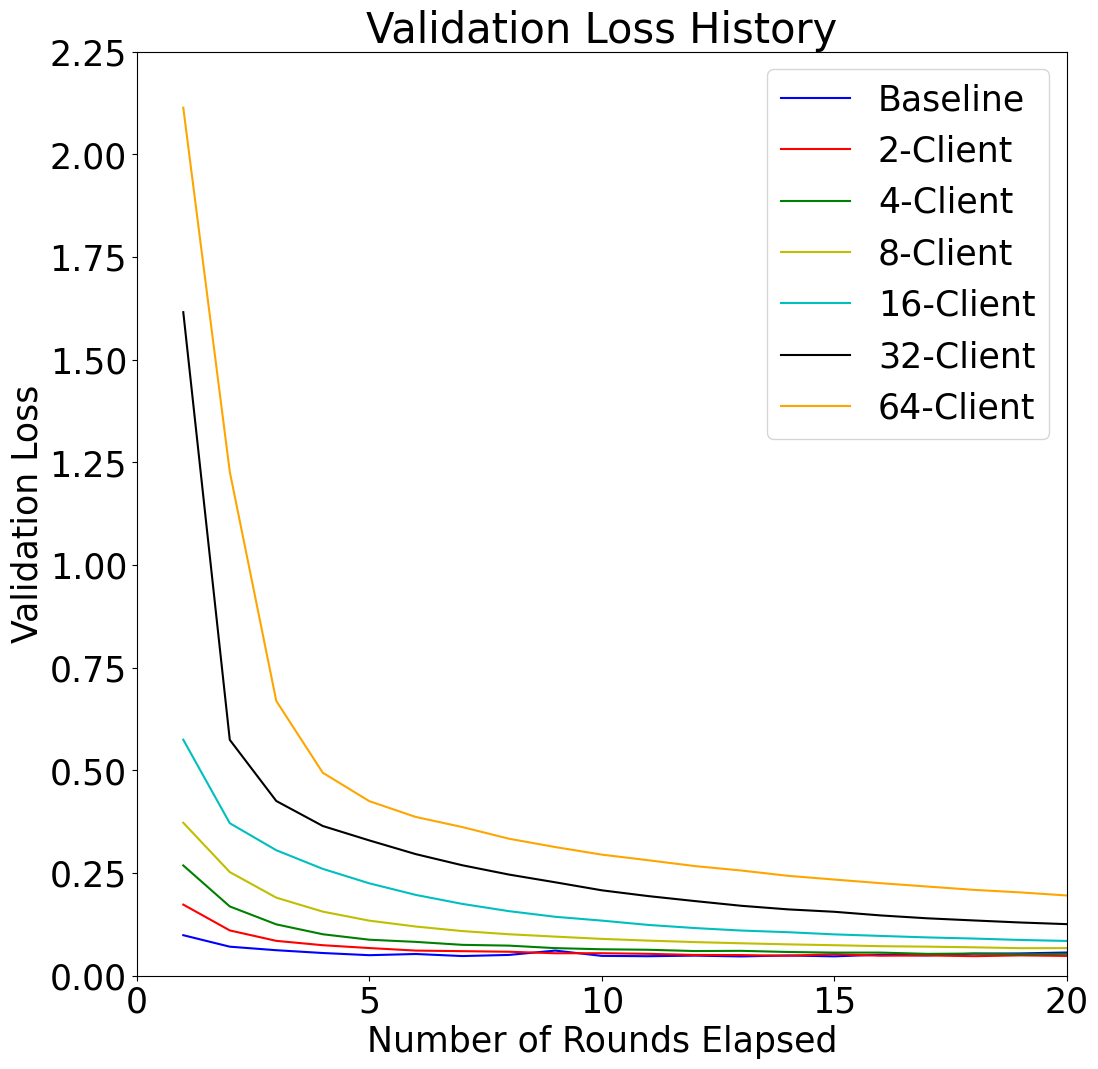

In [23]:
plt.plot([i + 1 for i in range(len(loss_bs))], [loss_bs[i][1] for i in range(len(loss_bs))], color='b', label='Baseline')
plt.plot([i + 1 for i in range(len(loss_tc))], [loss_tc[i][1] for i in range(len(loss_tc))], color='r', label='2-Client')
plt.plot([i + 1 for i in range(len(loss_fc))], [loss_fc[i][1] for i in range(len(loss_fc))], color='g', label='4-Client')
plt.plot([i + 1 for i in range(len(loss_ec))], [loss_ec[i][1] for i in range(len(loss_ec))], color='y', label='8-Client')
plt.plot([i + 1 for i in range(len(loss_st))], [loss_st[i][1] for i in range(len(loss_st))], color='c', label='16-Client')
plt.plot([i + 1 for i in range(len(loss_tt))], [loss_tt[i][1] for i in range(len(loss_tt))], color='k', label='32-Client')
plt.plot([i + 1 for i in range(len(loss_sf))], [loss_sf[i][1] for i in range(len(loss_sf))], color='orange', label='64-Client')

ax = plt.gca()
ax.set_xlim([1, 20])
ax.set_ylim([0, 2.25])
#plt.xticks(range(1,21))
ax.set_xticks(ax.get_xticks()[::2])

plt.legend()
plt.title('Validation Loss History')
plt.xlabel("Number of Rounds Elapsed")
plt.ylabel("Validation Loss")
plt.show()

In [24]:
s = str(re.escape('dev_acc = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

matches = re.findall(s+"(.*?)"+e, two_c)
for i in matches:
  acc_tc.append(float(i))

In [25]:
s = str(re.escape('dev_acc = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

matches = re.findall(s+"(.*?)"+e, four_c)
for i in matches:
  acc_fc.append(float(i))

In [26]:
s = str(re.escape('dev_acc = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

matches = re.findall(s+"(.*?)"+e, eight_c)
for i in matches:
  acc_ec.append(float(i))

In [27]:
s = str(re.escape('dev_acc = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

matches = re.findall(s+"(.*?)"+e, st_client)
for i in matches:
  acc_st.append(float(i))

In [28]:
s = str(re.escape('dev_acc = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

matches = re.findall(s+"(.*?)"+e, tt_client)
for i in matches:
  acc_tt.append(float(i))

In [29]:
s = str(re.escape('dev_acc = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

matches = re.findall(s+"(.*?)"+e, sf_client)
for i in matches:
  acc_sf.append(float(i))

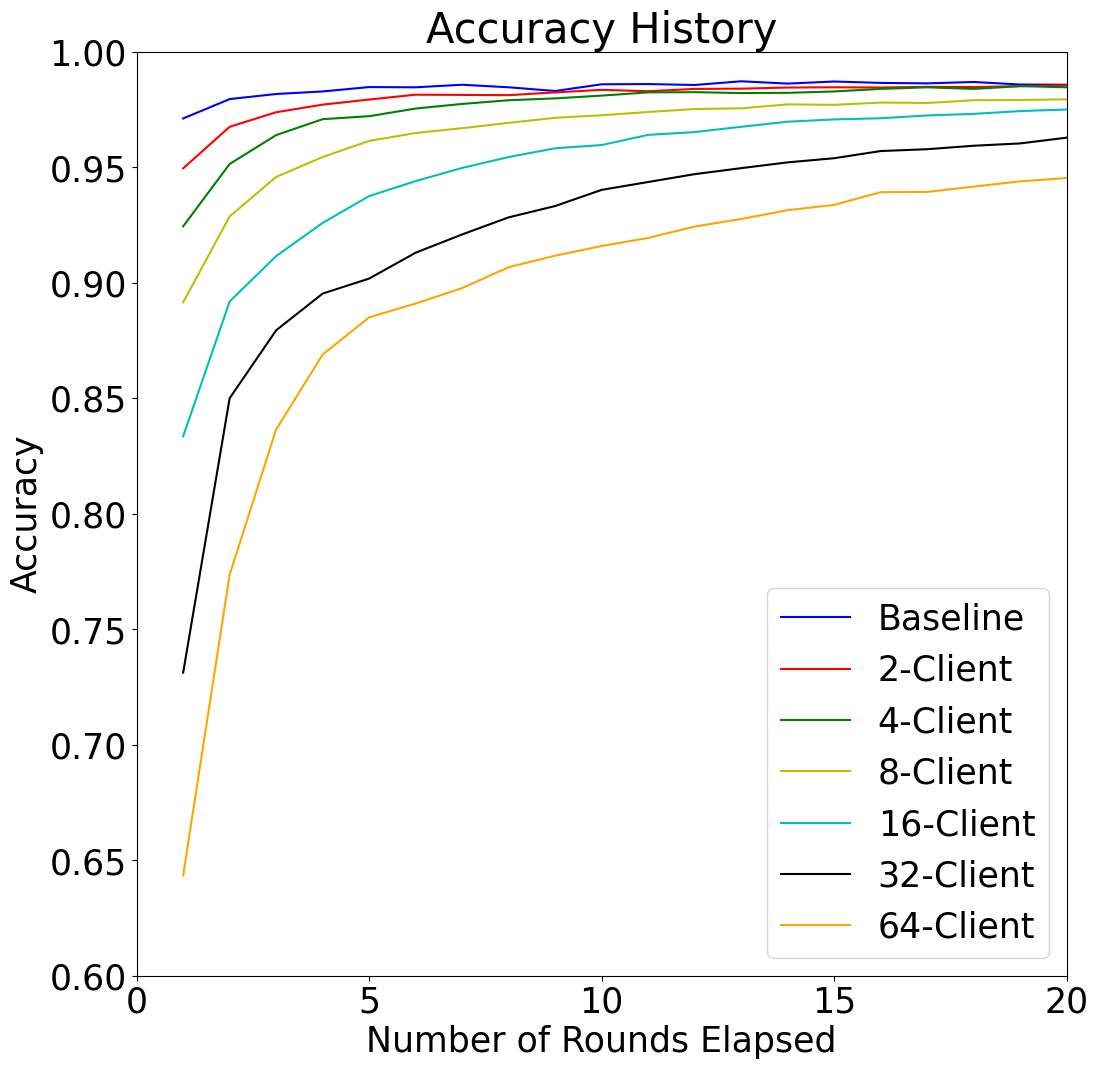

In [30]:
plt.plot([i + 1 for i in range(len(acc_bs))], [acc_bs[i] for i in range(len(acc_bs))], color='b', label='Baseline')
plt.plot([i + 1 for i in range(len(acc_tc))], [acc_tc[i] for i in range(len(acc_tc))], color='r', label='2-Client')
plt.plot([i + 1 for i in range(len(acc_fc))], [acc_fc[i] for i in range(len(acc_fc))], color='g', label='4-Client')
plt.plot([i + 1 for i in range(len(acc_ec))], [acc_ec[i] for i in range(len(acc_ec))], color='y', label='8-Client')
plt.plot([i + 1 for i in range(len(acc_st))], [acc_st[i] for i in range(len(acc_st))], color='c', label='16-Client')
plt.plot([i + 1 for i in range(len(acc_tt))], [acc_tt[i] for i in range(len(acc_tt))], color='k', label='32-Client')
plt.plot([i + 1 for i in range(len(acc_sf))], [acc_sf[i] for i in range(len(acc_sf))], color='orange', label='64-Client')

ax = plt.gca()
ax.set_xlim([1, 20])
ax.set_ylim([0.6, 1])
#plt.xticks(range(1,21))
ax.set_xticks(ax.get_xticks()[::2])
plt.legend()
plt.title('Accuracy History')
plt.xlabel("Number of Rounds Elapsed")
plt.ylabel("Accuracy")
plt.show()

In [31]:
s = str(re.escape('dev_prec = '))
t = str(re.escape('dev_rec = '))
u = str(re.escape('dev_f1 = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

ps = re.findall(s+"(.*?)"+e, two_c)
rs = re.findall(t+"(.*?)"+e, two_c)
fs = re.findall(u+"(.*?)(?:\n|$)", two_c)

for i in range(len(ps)):
  ex = (float(ps[i]), float(rs[i]), float(fs[i]))
  prf_tc.append(ex)

In [32]:
s = str(re.escape('dev_prec = '))
t = str(re.escape('dev_rec = '))
u = str(re.escape('dev_f1 = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

ps = re.findall(s+"(.*?)"+e, four_c)
rs = re.findall(t+"(.*?)"+e, four_c)
fs = re.findall(u+"(.*?)(?:\n|$)", four_c)

for i in range(len(ps)):
  ex = (float(ps[i]), float(rs[i]), float(fs[i]))
  prf_fc.append(ex)

In [33]:
s = str(re.escape('dev_prec = '))
t = str(re.escape('dev_rec = '))
u = str(re.escape('dev_f1 = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

ps = re.findall(s+"(.*?)"+e, eight_c)
rs = re.findall(t+"(.*?)"+e, eight_c)
fs = re.findall(u+"(.*?)(?:\n|$)", eight_c)

for i in range(len(ps)):
  ex = (float(ps[i]), float(rs[i]), float(fs[i]))
  prf_ec.append(ex)

In [34]:
s = str(re.escape('dev_prec = '))
t = str(re.escape('dev_rec = '))
u = str(re.escape('dev_f1 = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

ps = re.findall(s+"(.*?)"+e, st_client)
rs = re.findall(t+"(.*?)"+e, st_client)
fs = re.findall(u+"(.*?)(?:\n|$)", st_client)

for i in range(len(ps)):
  ex = (float(ps[i]), float(rs[i]), float(fs[i]))
  prf_st.append(ex)

In [35]:
s = str(re.escape('dev_prec = '))
t = str(re.escape('dev_rec = '))
u = str(re.escape('dev_f1 = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

ps = re.findall(s+"(.*?)"+e, tt_client)
rs = re.findall(t+"(.*?)"+e, tt_client)
fs = re.findall(u+"(.*?)(?:\n|$)", tt_client)

for i in range(len(ps)):
  ex = (float(ps[i]), float(rs[i]), float(fs[i]))
  prf_tt.append(ex)

In [36]:
s = str(re.escape('dev_prec = '))
t = str(re.escape('dev_rec = '))
u = str(re.escape('dev_f1 = '))
e = str(re.escape(','))
n = str(re.escape('\n'))

ps = re.findall(s+"(.*?)"+e, sf_client)
rs = re.findall(t+"(.*?)"+e, sf_client)
fs = re.findall(u+"(.*?)(?:\n|$)", sf_client)

for i in range(len(ps)):
  ex = (float(ps[i]), float(rs[i]), float(fs[i]))
  prf_sf.append(ex)

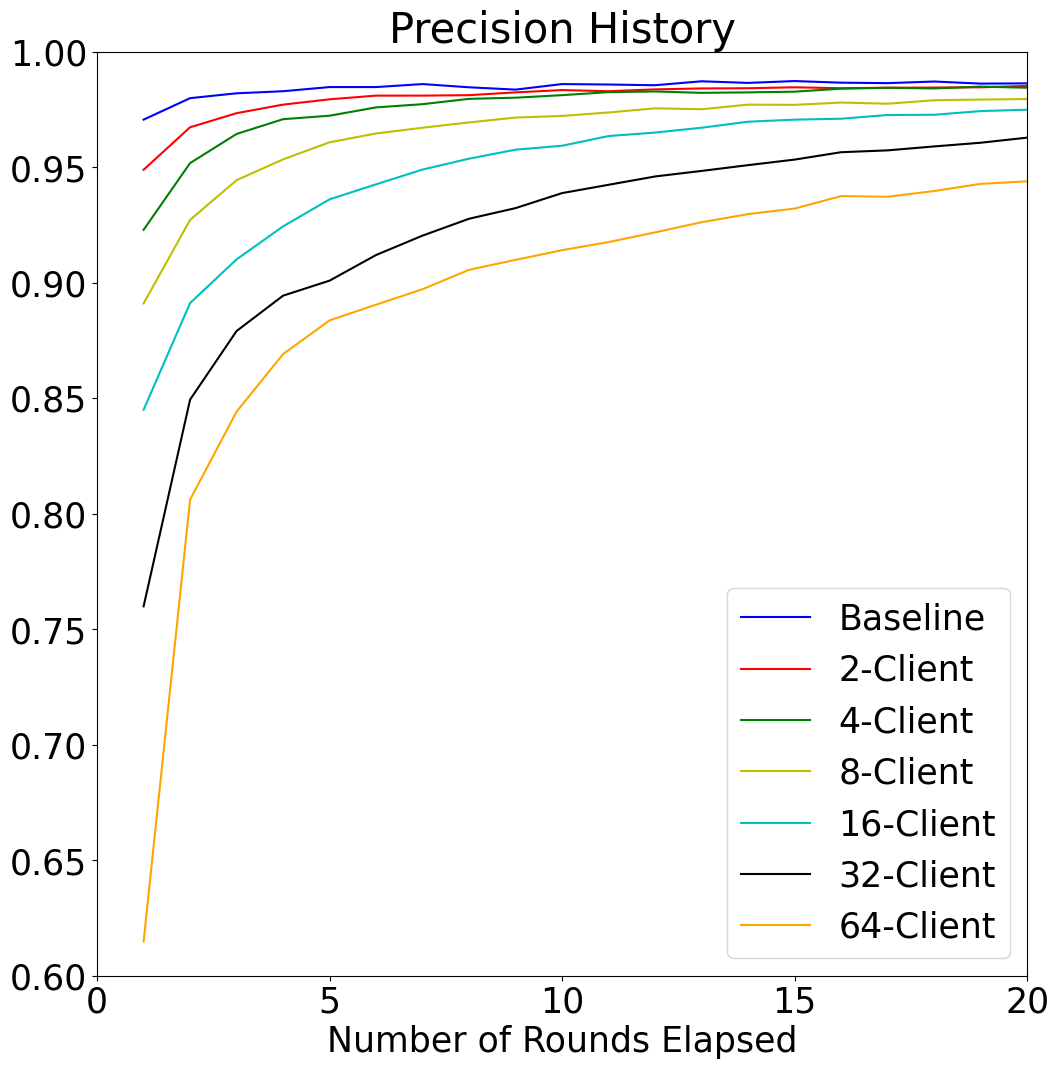

In [37]:
plt.plot([i + 1 for i in range(len(prf_bs))], [prf_bs[i][0] for i in range(len(prf_bs))], color='b', label='Baseline')
plt.plot([i + 1 for i in range(len(prf_tc))], [prf_tc[i][0] for i in range(len(prf_tc))], color='r', label='2-Client')
plt.plot([i + 1 for i in range(len(prf_fc))], [prf_fc[i][0] for i in range(len(prf_fc))], color='g', label='4-Client')
plt.plot([i + 1 for i in range(len(prf_ec))], [prf_ec[i][0] for i in range(len(prf_ec))], color='y', label='8-Client')
plt.plot([i + 1 for i in range(len(prf_st))], [prf_st[i][0] for i in range(len(prf_st))], color='c', label='16-Client')
plt.plot([i + 1 for i in range(len(prf_tt))], [prf_tt[i][0] for i in range(len(prf_tt))], color='k', label='32-Client')
plt.plot([i + 1 for i in range(len(prf_sf))], [prf_sf[i][0] for i in range(len(prf_sf))], color='orange', label='64-Client')

ax = plt.gca()
ax.set_xlim([1, 20])
ax.set_ylim([0.6, 1])
#plt.xticks(range(1,21))
ax.set_xticks(ax.get_xticks()[::2])
plt.legend()
plt.title('Precision History')
plt.xlabel("Number of Rounds Elapsed")
plt.show()

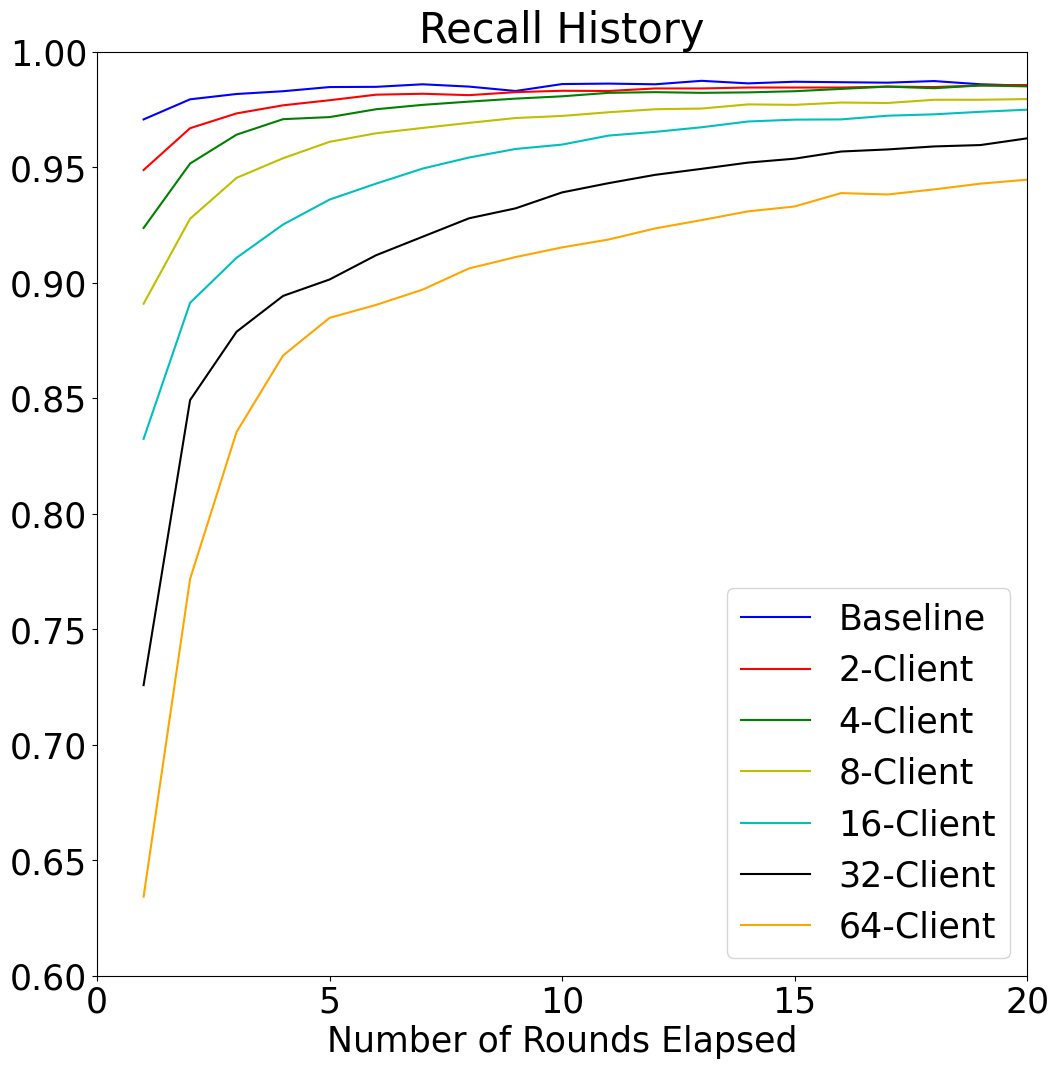

In [38]:
plt.plot([i + 1 for i in range(len(prf_bs))], [prf_bs[i][1] for i in range(len(prf_bs))], color='b', label='Baseline')
plt.plot([i + 1 for i in range(len(prf_tc))], [prf_tc[i][1] for i in range(len(prf_tc))], color='r', label='2-Client')
plt.plot([i + 1 for i in range(len(prf_fc))], [prf_fc[i][1] for i in range(len(prf_fc))], color='g', label='4-Client')
plt.plot([i + 1 for i in range(len(prf_ec))], [prf_ec[i][1] for i in range(len(prf_ec))], color='y', label='8-Client')
plt.plot([i + 1 for i in range(len(prf_st))], [prf_st[i][1] for i in range(len(prf_st))], color='c', label='16-Client')
plt.plot([i + 1 for i in range(len(prf_tt))], [prf_tt[i][1] for i in range(len(prf_tt))], color='k', label='32-Client')
plt.plot([i + 1 for i in range(len(prf_sf))], [prf_sf[i][1] for i in range(len(prf_sf))], color='orange', label='64-Client')

ax = plt.gca()
ax.set_xlim([1, 20])
ax.set_ylim([0.6, 1])
#plt.xticks(range(1,21))
ax.set_xticks(ax.get_xticks()[::2])
plt.legend()
plt.title('Recall History')
plt.xlabel("Number of Rounds Elapsed")
plt.show()

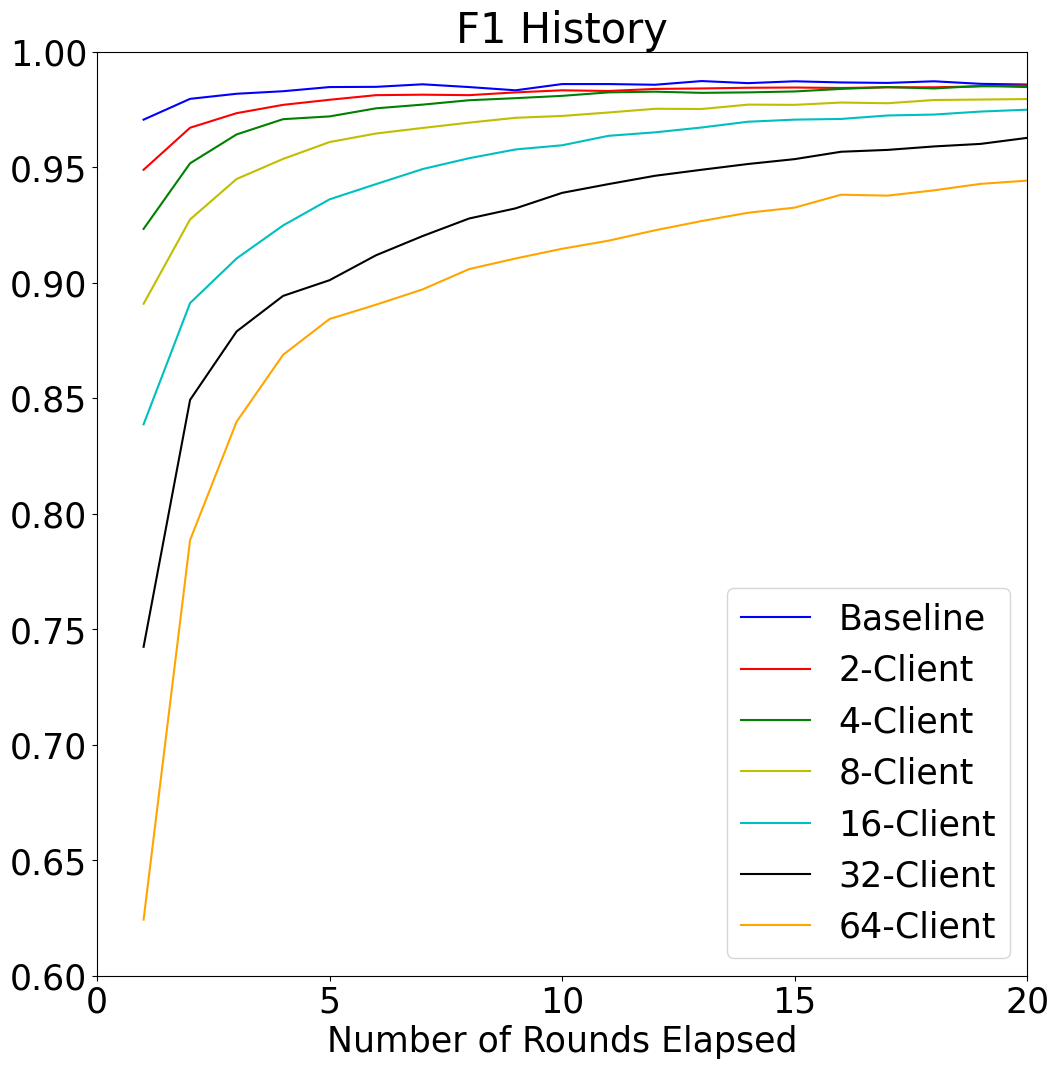

In [39]:
plt.plot([i + 1 for i in range(len(prf_bs))], [prf_bs[i][2] for i in range(len(prf_bs))], color='b', label='Baseline')
plt.plot([i + 1 for i in range(len(prf_tc))], [prf_tc[i][2] for i in range(len(prf_tc))], color='r', label='2-Client')
plt.plot([i + 1 for i in range(len(prf_fc))], [prf_fc[i][2] for i in range(len(prf_fc))], color='g', label='4-Client')
plt.plot([i + 1 for i in range(len(prf_ec))], [prf_ec[i][2] for i in range(len(prf_ec))], color='y', label='8-Client')
plt.plot([i + 1 for i in range(len(prf_st))], [prf_st[i][2] for i in range(len(prf_st))], color='c', label='16-Client')
plt.plot([i + 1 for i in range(len(prf_tt))], [prf_tt[i][2] for i in range(len(prf_tt))], color='k', label='32-Client')
plt.plot([i + 1 for i in range(len(prf_sf))], [prf_sf[i][2] for i in range(len(prf_sf))], color='orange', label='64-Client')

ax = plt.gca()
ax.set_xlim([1, 20])
ax.set_ylim([0.6, 1])
#plt.xticks(range(1,21))
ax.set_xticks(ax.get_xticks()[::2])
plt.legend()
plt.title('F1 History')
plt.xlabel("Number of Rounds Elapsed")
plt.show()

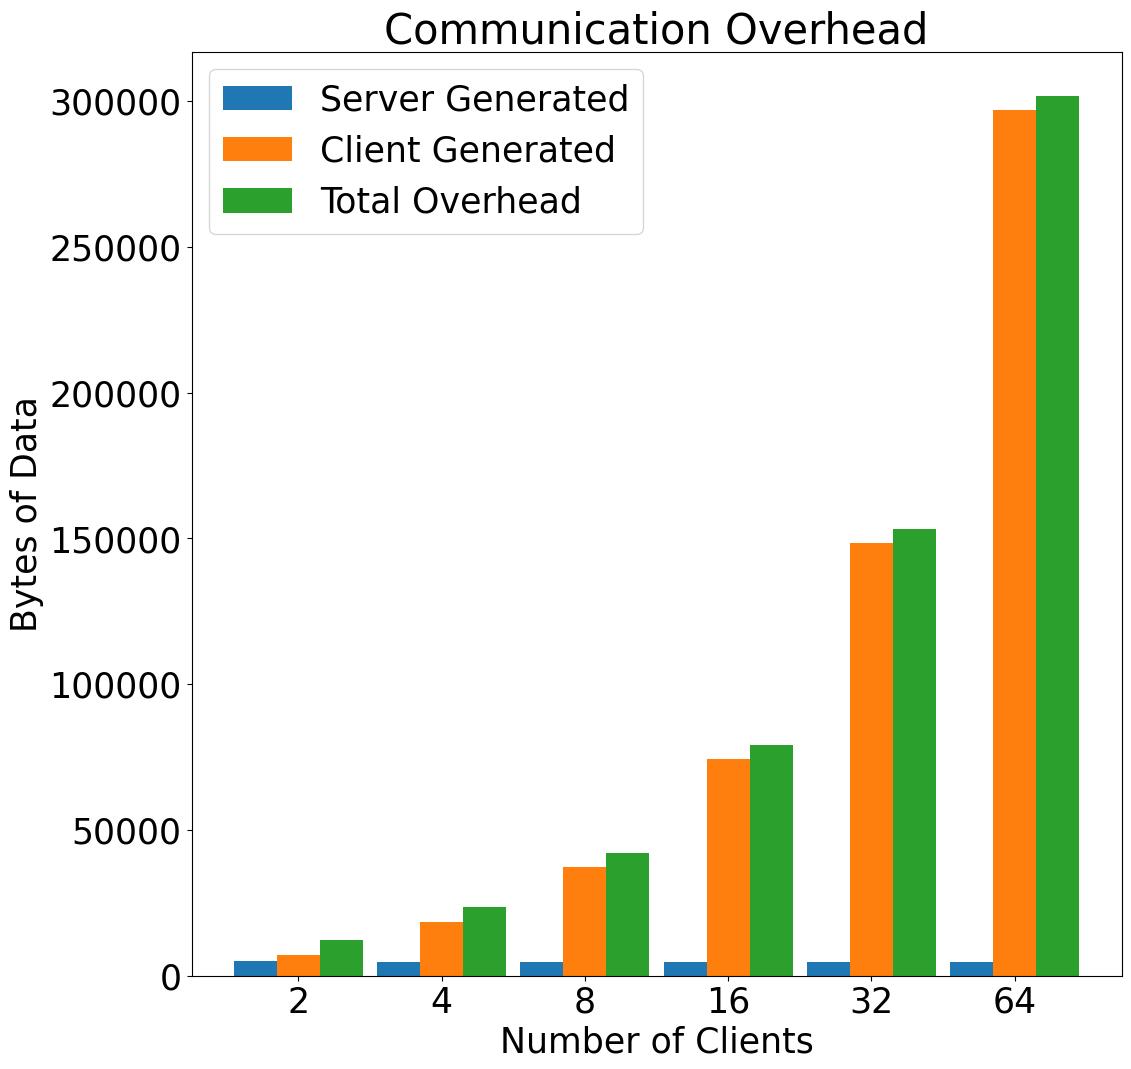

In [40]:
import numpy as np

X = ['2','4','8', '16','32','64']
sent = [5104, 4872, 4872, 4872, 4872, 4872]
recieved = [7200, 18560, 37120, 74240, 148480,296960]
total = [12304, 23432, 41992, 79112, 153352, 301832]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, sent, 0.3, label = 'Server Generated')
plt.bar(X_axis, recieved, 0.3, label = 'Client Generated')
plt.bar(X_axis + 0.3, total, 0.3, label = 'Total Overhead')

plt.xticks(X_axis, X)
plt.xlabel("Number of Clients")
plt.ylabel("Bytes of Data")
plt.title("Communication Overhead")
plt.legend()
plt.show()